# Movie Data Exploration 

This notebook explores the movies dataset we have developed. It uses a variety of the data visualizations we have learned in order to understand the composition of our data. The related GitHub for this project is here: https://github.com/georgetown-analytics/Box-Office.  

The raw data sources were cleaned, wrangled, and pre-processed in separate python codes stored here: https://github.com/georgetown-analytics/Box-Office/tree/master/codes.  

The final dataset is stored in a SQLite database here: https://github.com/georgetown-analytics/Box-Office/tree/master/database.

This notebooks is for the model exploration stage of the project.

Author: Rebecca George.  Team Box Office: George Brooks, Rebecca George, Lance Liu

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
import numpy as np
import pandas.io.sql as pd_sql
import sqlite3 as sql
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import os
%matplotlib notebook

Get path to folder storing the SQLite database

In [43]:
two_up = os.path.abspath(os.path.join(os.getcwd(),"../.."))
path = two_up + '\database\movies.db'

In [11]:
con = sql.connect(path) 

data = pd_sql.read_sql('select * from finalMovies_20180814', con, index_col='index')


### Limit dataset to movies that will be used in modeling.

We will create the new feature "Profit_Bucket_Binary", convert any "nan" in the historical cast/crew revenue columns to 0. 

In [12]:
#Limit dataset to those with filled in Revenue, Budget, and Length columns.  Based on what I've seen, this helps to
#get rid of remaining duplicates in dataset.  Also helps to narrow down dataset to test profitability, where we
#need both revenue and budget filled in.  We could experiment with movies with revenue greater than $100,000, if 
#we choose to.
movies = data[(data['Revenue_Real']>0)&(data['Budget_Real']>0)&(data['Length']>0)]

#Make binary variable for if movie made at least 2x budget
movies['Profit_Bucket_Binary']=np.where(movies['Profit_Bucket']=='<1x', 0, np.where(movies['Profit_Bucket']=='[1-2x)', 
                        0, np.where(movies['Profit_Bucket']=='[2-3x)', 1, np.where(movies['Profit_Bucket']=='[3-4x)', 
                        1, np.where(movies['Profit_Bucket']=='[4-5x)', 1, np.where(movies['Profit_Bucket']=='>=5x', 1, ''))))))

#Put zero where null
movies['Revenue_Actor_Real']=movies['Revenue_Actor_Real'].apply(lambda x: 0 if pd.isnull(x) else x)
movies['Revenue_Director_Real']=movies['Revenue_Director_Real'].apply(lambda x: 0 if pd.isnull(x) else x)
movies['Revenue_Writer_Real']=movies['Revenue_Writer_Real'].apply(lambda x: 0 if pd.isnull(x) else x)


In [13]:
movies.describe()

,movieId,tmdbId,Rating_MovieLens,Year,imdbVotes,Rating_RT,Revenue,Length,Budget,Movie_VoteAvg,...,Comp_WarnerBros,Comp_Other,Revenue_Actor,Revenue_Actor_Real,Revenue_Director,Revenue_Director_Real,Revenue_Writer,Revenue_Writer_Real,Revenue_Producer,Revenue_Producer_Real
count,4.096000e+03,4.096000e+03,4094.000000,4414.000000,4.390000e+03,4414.000000,4.414000e+03,4414.000000,4.414000e+03,4126.000000,...,4414.000000,4414.000000,4.052000e+03,4.414000e+03,2.429000e+03,4.414000e+03,2.606000e+03,4.414000e+03,2.620000e+03,2.620000e+03
mean,6.504730e+04,7.601278e+04,55.417508,2007.562981,8.700767e+04,51.266878,9.343896e+07,105.348852,3.412154e+07,6.122377,...,0.131853,0.884005,2.549756e+09,3.061415e+09,3.587869e+08,2.618343e+08,8.579069e+08,6.457472e+08,1.294076e+09,1.674370e+09
std,6.625858e+04,1.090444e+05,3344.392460,6.306903,1.434036e+05,26.985504,1.811419e+08,17.280716,4.237146e+07,1.075922,...,0.338369,0.320255,2.859420e+09,3.523607e+09,6.134493e+08,6.356527e+08,2.312489e+09,2.176943e+09,1.897195e+09,2.360582e+09
min,1.000000e+00,5.000000e+00,0.500000,1995.000000,6.000000e+00,0.000000,1.000000e+00,4.000000,1.000000e+00,0.000000,...,0.000000,0.000000,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,2.972239e+00
25%,5.811500e+03,9.834250e+03,2.823151,2002.000000,1.063025e+04,28.000000,4.062509e+06,93.000000,7.000000e+06,5.587902,...,0.000000,1.000000,5.035141e+08,4.436951e+08,2.436483e+07,0.000000e+00,4.340367e+07,0.000000e+00,1.233484e+08,1.699989e+08
50%,6.104750e+04,2.078200e+04,3.179243,2008.000000,3.680700e+04,52.000000,2.785290e+07,103.000000,2.000000e+07,6.141958,...,0.000000,1.000000,1.597821e+09,1.891177e+09,1.288646e+08,2.608837e+06,2.137190e+08,2.021376e+07,5.560227e+08,7.575831e+08
75%,1.028862e+05,8.936675e+04,3.493760,2013.000000,9.773600e+04,75.000000,9.896295e+07,115.000000,4.400000e+07,6.700000,...,0.000000,1.000000,3.581195e+09,4.447836e+09,4.170343e+08,2.084328e+08,7.803051e+08,4.643165e+08,1.620809e+09,2.135693e+09
max,2.120338e+06,2.023923e+06,213992.000000,2018.000000,1.911376e+06,100.000000,2.787965e+09,242.000000,3.876500e+08,45.000000,...,1.000000,1.000000,2.338904e+10,2.841186e+10,5.619555e+09,7.075528e+09,4.954545e+10,5.400238e+10,1.953187e+10,2.300313e+10


### Look at characteristics of revenue and budget in our dataset

Plot log and non logged data, look at historical trend in revenue

<IPython.core.display.Javascript object>


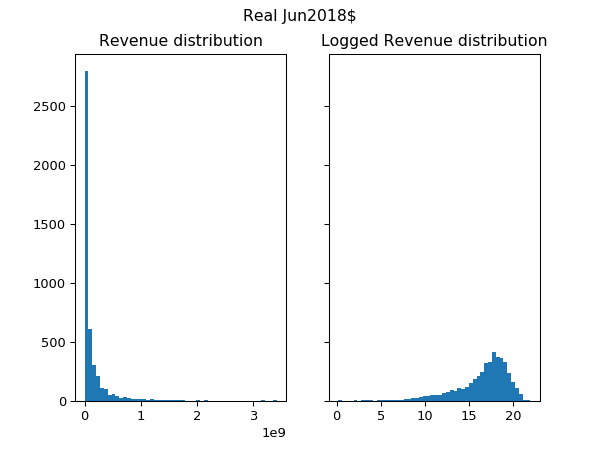

In [14]:
#Plot movie revenue data both logged and non logged
fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle('Real Jun2018$')
axs[0].hist(movies['Revenue_Real'], bins=50)
axs[0].set_title('Revenue distribution')
axs[1].hist(np.log(movies['Revenue_Real']), bins=50)
axs[1].set_title('Logged Revenue distribution')
plt.show()

<IPython.core.display.Javascript object>


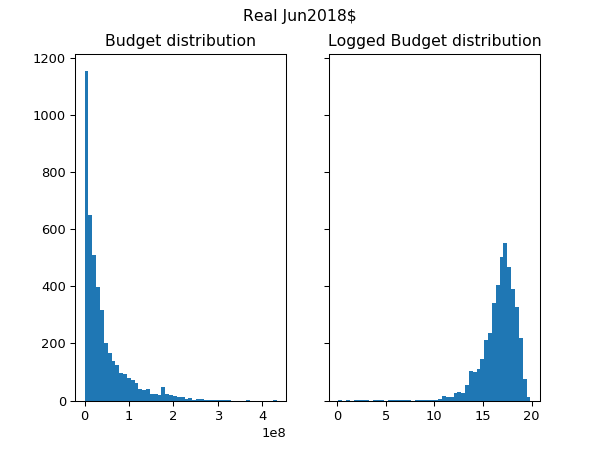

In [15]:
#Plot movie budget data both logged and non logged
fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle('Real Jun2018$')
axs[0].hist(movies['Budget_Real'], bins=50)
axs[0].set_title('Budget distribution')
axs[1].hist(np.log(movies['Budget_Real']), bins=50)
axs[1].set_title('Logged Budget distribution')
plt.show()

In [16]:
#Print out highest grossing movies, real dollars
movies[['Date', 'Name', 'Revenue_Real']].sort_values(by='Revenue_Real', ascending=False).head(10)

,Date,Name,Revenue_Real
index,,,
5975,1997-11-18 00:00:00,titanic,3.425755e+09
2868,2009-12-10 00:00:00,avatar,3.217806e+09
734,2015-12-15 00:00:00,star wars: the force awakens,2.181537e+09
33,2018-04-27 00:00:00,avengers: infinity war,2.050780e+09
904,2015-06-06 00:00:00,jurassic world,1.764854e+09
2052,2012-04-25 00:00:00,the avengers,1.663235e+09
963,2015-04-01 00:00:00,furious 7,1.613204e+09
4642,2003-12-01 00:00:00,the lord of the rings: the return of the king,1.543553e+09
936,2015-04-22 00:00:00,avengers: age of ultron,1.495825e+09


In [46]:
#Print out most profitable movies, real dollars
movies[['Date', 'Name', 'Profit_Real']].sort_values(by='Profit_Real', ascending=False).head(10)

,Date,Name,Profit_Real
index,,,
5975,1997-11-18 00:00:00,titanic,3.115480e+09
2868,2009-12-10 00:00:00,avatar,2.890020e+09
734,2015-12-15 00:00:00,star wars: the force awakens,1.923114e+09
33,2018-04-27 00:00:00,avengers: infinity war,1.749767e+09
904,2015-06-06 00:00:00,jurassic world,1.589341e+09
2052,2012-04-25 00:00:00,the avengers,1.421065e+09
4642,2003-12-01 00:00:00,the lord of the rings: the return of the king,1.416434e+09
963,2015-04-01 00:00:00,furious 7,1.411384e+09
2355,2011-07-07 00:00:00,harry potter and the deathly hallows,1.354480e+09


In [45]:
#Print out worse performing movies based on profit, real dollars
movies[['Date', 'Name', 'Profit_Real']].sort_values(by='Profit_Real', ascending=True).head(10)

,Date,Name,Profit_Real
index,,,
4556,2004-04-07 00:00:00,the alamo,-1.417998e+08
4982,2002-08-15 00:00:00,the adventures of pluto nash,-1.291059e+08
6282,1995-12-22 00:00:00,cutthroat island,-1.271118e+08
2479,2011-03-09 00:00:00,mars needs moms,-1.242220e+08
5285,2001-04-27 00:00:00,town & country,-1.185708e+08
5561,2000-01-14 00:00:00,supernova,-1.002716e+08
5326,2001-02-23 00:00:00,monkeybone,-9.918898e+07
4281,2005-05-15 00:00:00,a sound of thunder,-9.549611e+07
6002,1997-09-27 00:00:00,lolita,-9.483382e+07


<IPython.core.display.Javascript object>


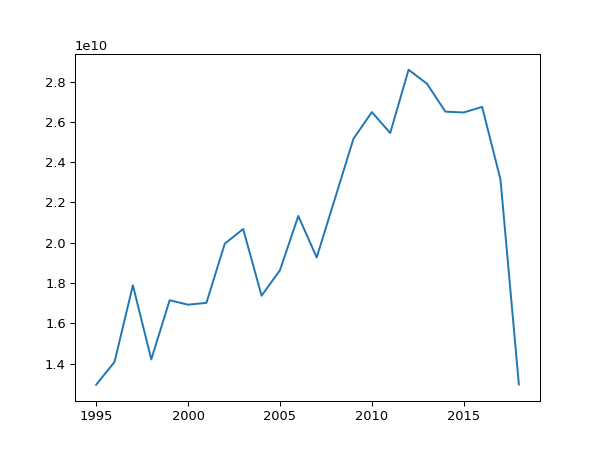

In [17]:
%matplotlib notebook
#Print out yearly box office gross. Note we only have Jan-Jun 2018 movies, which is why it dips significantly.
plot_rev = movies.groupby(['Year'])['Revenue_Real'].agg('sum')
plt.plot(plot_rev )

<IPython.core.display.Javascript object>


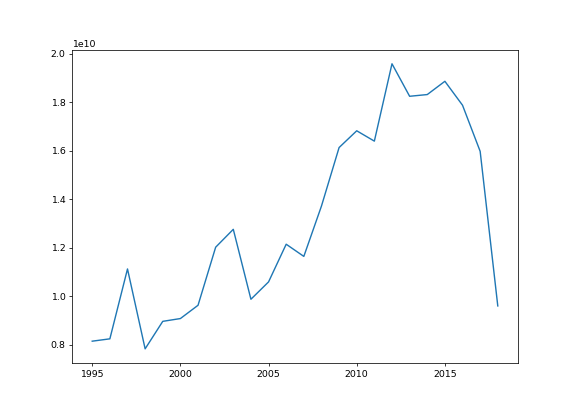

In [48]:
%matplotlib notebook
#Print out yearly box office gross. Note we only have Jan-Jun 2018 movies, which is why it dips significantly.
plot_prof = movies.groupby(['Year'])['Profit_Real'].agg('sum')
plt.plot(plot_prof )

### Explore using various jointplots and boxplots.



<IPython.core.display.Javascript object>


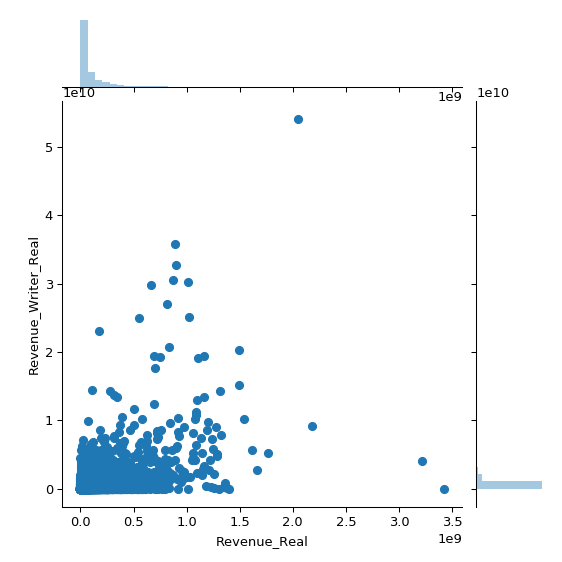

In [18]:
#Experiment with jointplots.
g = sns.jointplot("Revenue_Real", "Revenue_Writer_Real", movies)

<IPython.core.display.Javascript object>


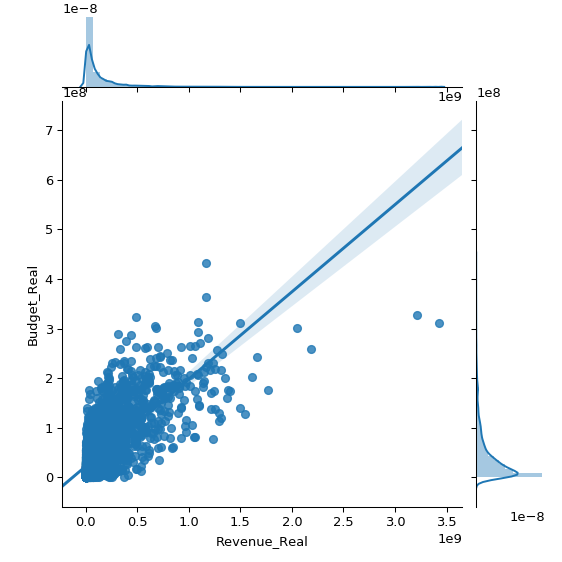

In [19]:
g = sns.jointplot(x=(movies["Revenue_Real"]),  y=(movies["Budget_Real"]), kind='reg',data=movies)

<IPython.core.display.Javascript object>


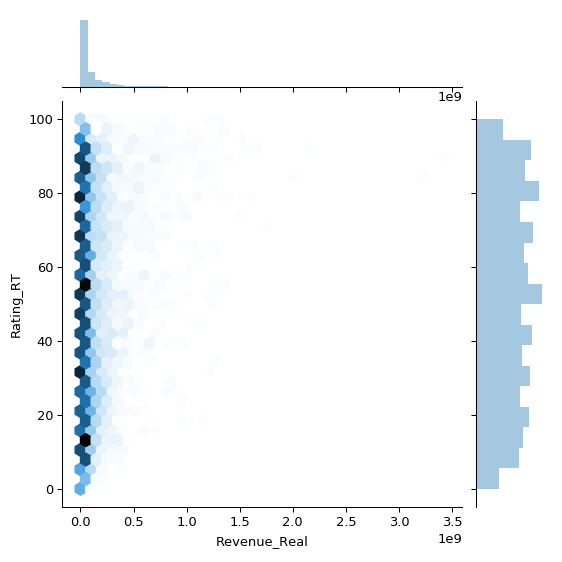

In [20]:
g = sns.jointplot(x=(movies['Revenue_Real']), y=movies['Rating_RT'],  kind='hex', data=movies)

<IPython.core.display.Javascript object>


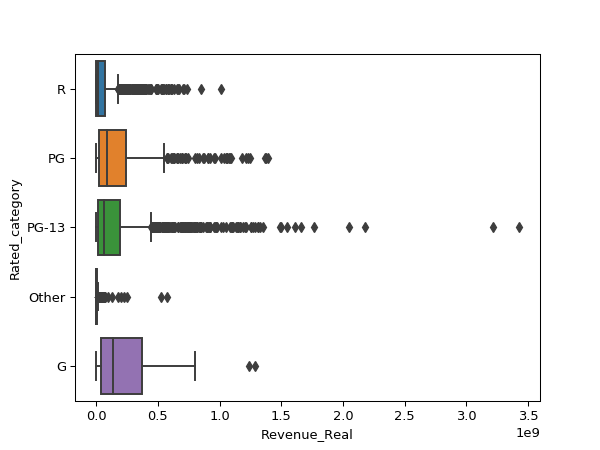

In [21]:
ax = sns.boxplot(x=(movies["Revenue_Real"]), y=movies['Rated_category'])

<IPython.core.display.Javascript object>


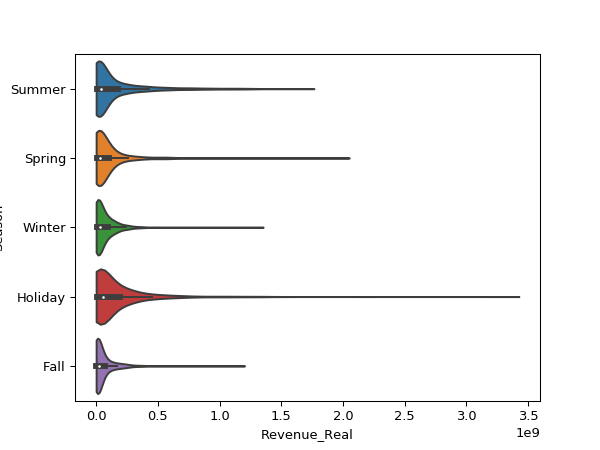

In [22]:
ax = sns.violinplot(x=(movies["Revenue_Real"]), y=movies['Season'],scale="width", cut=0)

<IPython.core.display.Javascript object>


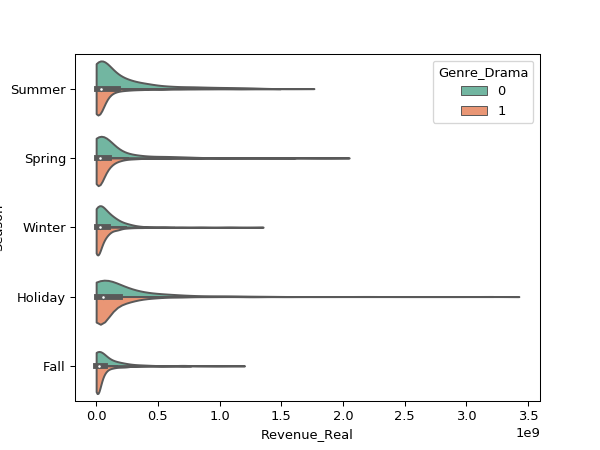

In [23]:
ax = sns.violinplot(x=(movies["Revenue_Real"]), y=movies["Season"], hue=movies['Genre_Drama'],cut=0, 
                    palette="Set2", split=True,scale="count")

<IPython.core.display.Javascript object>


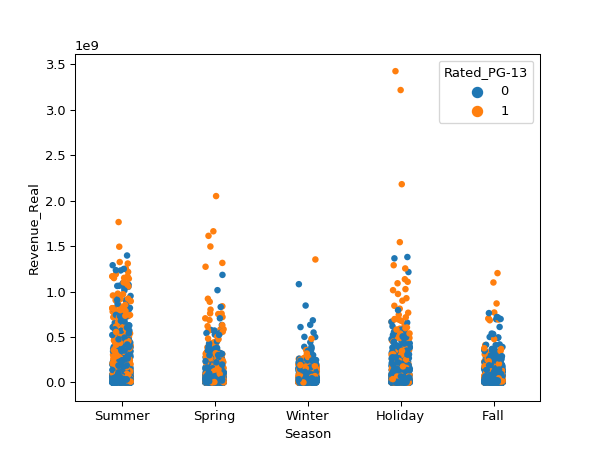

In [24]:
ax = sns.stripplot(x=movies["Season"], y=(movies["Revenue_Real"]), hue=movies["Rated_PG-13"],  jitter=True)

<IPython.core.display.Javascript object>


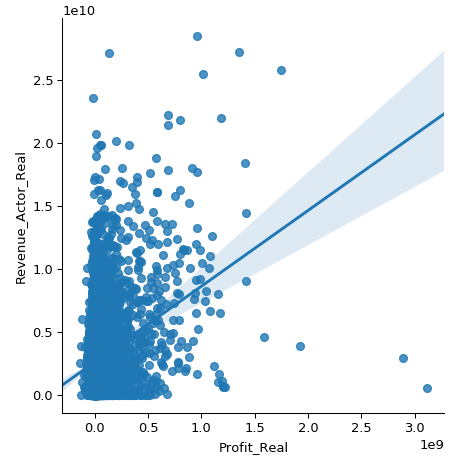

In [25]:
sns.pairplot(x_vars=["Profit_Real"], y_vars=["Revenue_Actor_Real"], data=movies,  height=5, kind='reg')

### Look at scatter matrix of a select few features


<IPython.core.display.Javascript object>


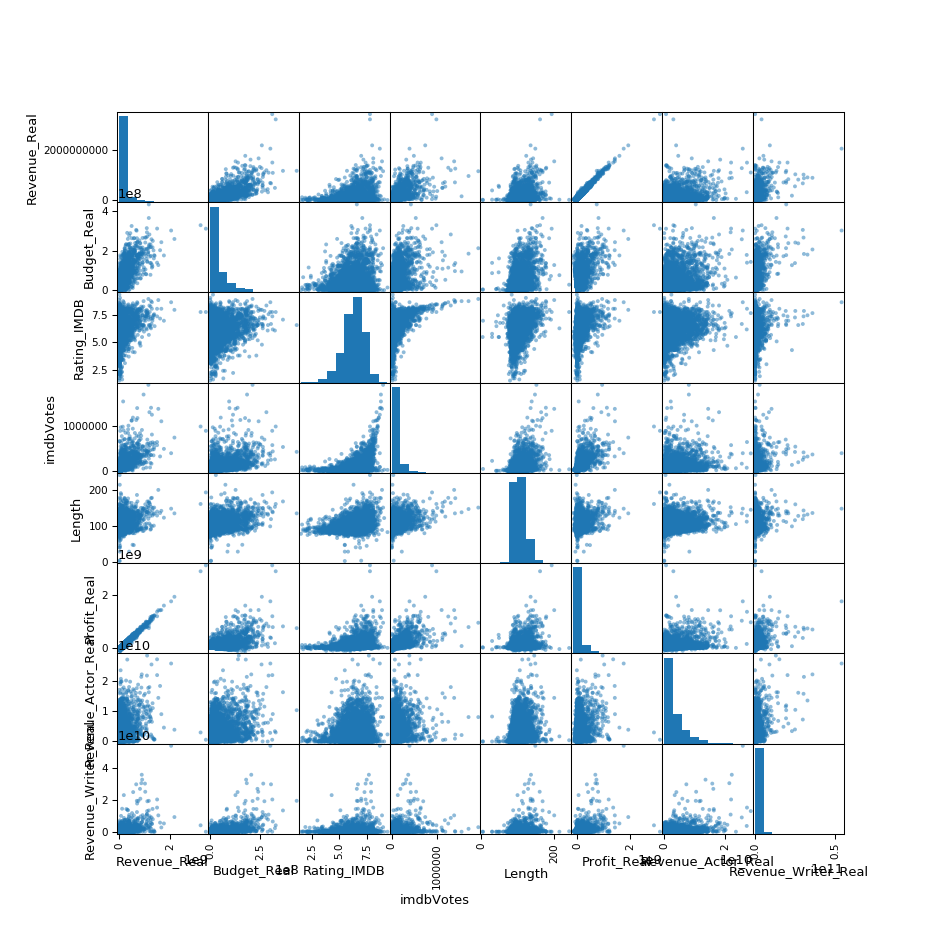

In [26]:
sample = movies[['Revenue_Real', 'Budget_Real','Rating_IMDB',  'imdbVotes', 'Length',  \
               'Profit_Real', 'Season', 'Revenue_Actor_Real', 'Revenue_Writer_Real']]
scatter_matrix(sample, figsize=(10,10))
plt.show()

### Look at some bar charts by season or rating


<IPython.core.display.Javascript object>


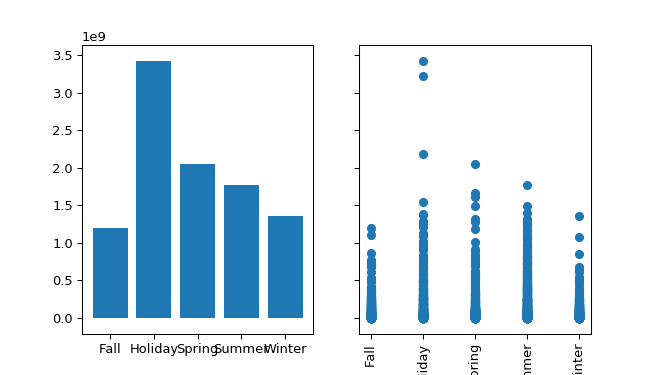

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(7, 4), sharey=True)
axs[0].bar(movies['Season'], movies['Revenue_Real'])
plt.xticks(rotation=90)
axs[1].scatter(movies['Season'], movies['Revenue_Real'])
plt.xticks(rotation=90)

plt.show()

<IPython.core.display.Javascript object>


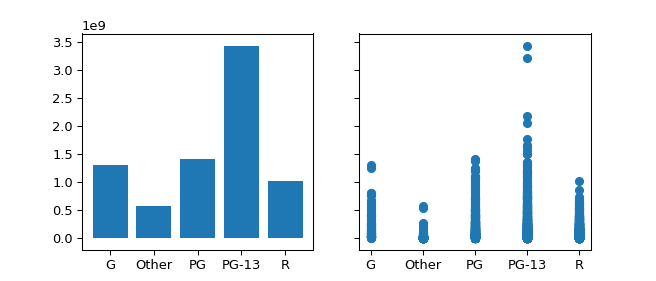

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)
axs[0].bar(movies['Rated_category'], movies['Revenue_Real'])
axs[1].scatter(movies['Rated_category'], movies['Revenue_Real'])
plt.show()

<IPython.core.display.Javascript object>


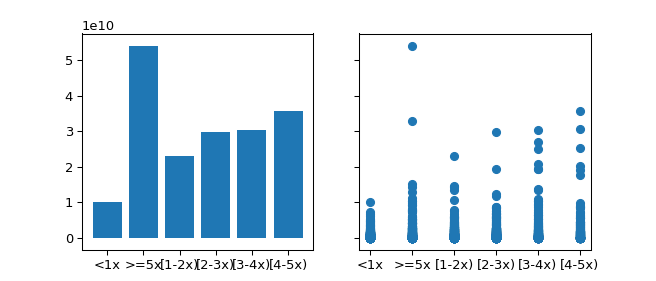

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)
axs[0].bar(movies['Profit_Bucket'], movies['Revenue_Writer_Real'])
axs[1].scatter(movies['Profit_Bucket'], movies['Revenue_Writer_Real'])
plt.show()

### Revenue generation by characteristic

Sum of revenue by genre or production company. Note that there will be double counting here because most movies have multiple genres and companies associated with it. 

In [41]:
filter_col = [col for col in movies if col.startswith('Comp_')]
filter_col

['Comp_Disney',
 'Comp_DreamWorks',
 'Comp_Fox',
 'Comp_Lionsgate',
 'Comp_MGM',
 'Comp_Miramax',
 'Comp_Paramount',
 'Comp_Sony',
 'Comp_Universal',
 'Comp_WarnerBros',
 'Comp_Other']

{'Disney': 85302217100.24501, 'DreamWorks': 31477836378.732204, 'Fox': 74582879341.55553, 'Lionsgate': 24771085188.537354, 'MGM': 17271320638.03645, 'Miramax': 9432730849.309244, 'Paramount': 54149582762.006226, 'Sony': 68431232105.83013, 'Universal': 71064699612.685, 'WarnerBros': 98241113775.97762, 'Other': 414759661854.60913}


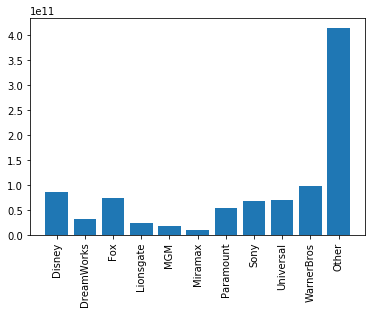

In [42]:
#Plot revenue by production company
#I haven't confirmed these findings with research yet.
%matplotlib inline
count = 0
company_rev = {}
for name in filter_col:
    company_rev[name[5:]] = movies.loc[movies[name] == 1, 'Revenue_Real'].sum()
print(company_rev) 
plt.bar(range(len(company_rev)), company_rev.values(), align="center")
plt.xticks(range(len(company_rev)), list(company_rev.keys()))
plt.xticks(rotation=90)
plt.show()

In [39]:
filter_col = [col for col in movies if col.startswith('Genre_')]
filter_col

['Genre_Drama',
 'Genre_Comedy',
 'Genre_Action_Adventure',
 'Genre_Thriller_Horror',
 'Genre_Romance',
 'Genre_Crime_Mystery',
 'Genre_Animation',
 'Genre_Scifi',
 'Genre_Documentary',
 'Genre_Other']

{'Drama': 179611469960.98782, 'Comedy': 190338661234.8271, 'Action_Adventure': 317192079093.287, 'Thriller_Horror': 145232623787.75073, 'Romance': 78880074786.70947, 'Crime_Mystery': 106201637939.14117, 'Animation': 75135931562.52225, 'Scifi': 111505171631.82527, 'Documentary': 2362988950.700117, 'Other': 241648024542.01752}


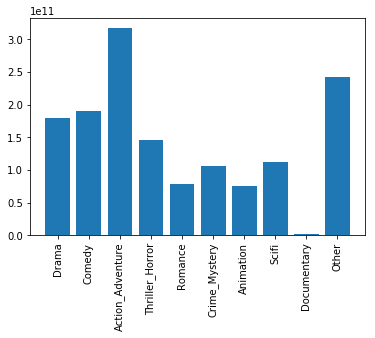

In [40]:
#Plot revenue by production company
#I haven't confirmed these findings with research yet.
count = 0
genre_rev = {}
for name in filter_col:
    genre_rev[name[6:]] = movies.loc[movies[name] == 1, 'Revenue_Real'].sum()
print(genre_rev) 
plt.bar(range(len(genre_rev)), genre_rev.values(), align="center")
plt.xticks(range(len(genre_rev)), list(genre_rev.keys()))
plt.xticks(rotation=90)

plt.show()

### Count by profitability


<1x       1710
[1-2x)     829
[2-3x)     642
>=5x       632
[3-4x)     354
[4-5x)     247
Name: Profit_Bucket, dtype: int64


<IPython.core.display.Javascript object>


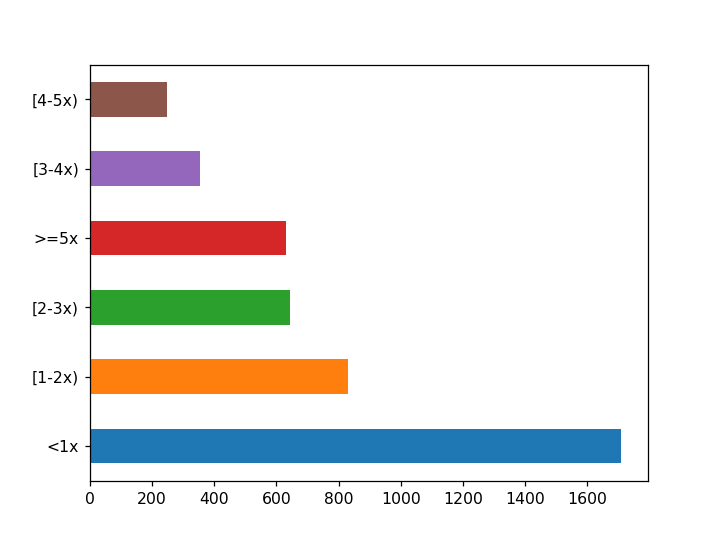

In [93]:
print(movies['Profit_Bucket'].value_counts())
movies['Profit_Bucket'].value_counts().plot(kind='barh')
plt.show()

0    2539
1    1875
Name: Profit_Bucket_Binary, dtype: int64


<IPython.core.display.Javascript object>


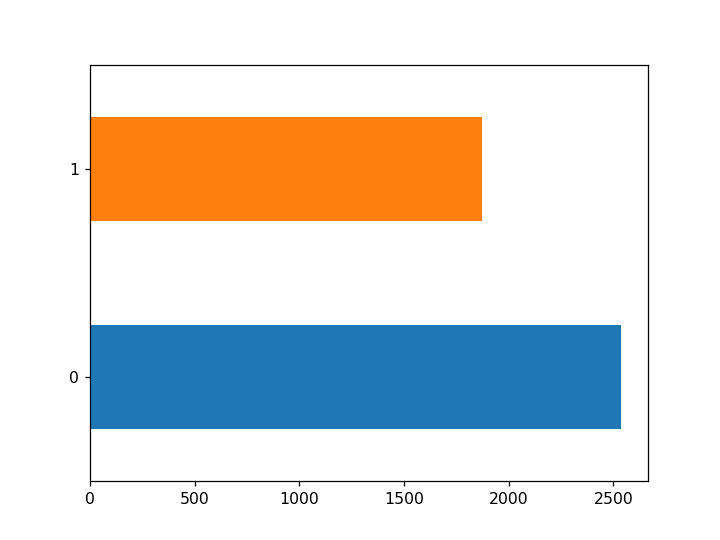

In [94]:
print(movies['Profit_Bucket_Binary'].value_counts())
movies['Profit_Bucket_Binary'].value_counts().plot(kind='barh')
plt.show()